<a href="https://colab.research.google.com/github/ApahSaroj/WPI/blob/main/AutoML_WPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

In [4]:
df = pd.read_excel('/content/drive/MyDrive/DATA/WQC_test.xlsx')

In [5]:
df.head()

,Unnamed: 0,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI,WQC
0,0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.8,0.758000,6.534660,0.06211,0.249528,Excellent
1,1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.8,0.196062,8.138620,0.00960,0.216400,Excellent
2,2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.8,0.298875,3.855625,0.01280,0.183814,Excellent
3,3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.6,0.299590,2.238750,0.01536,0.219282,Excellent
4,4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.3,0.106000,5.600000,0.01000,0.165831,Excellent


In [6]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.drop('WQC', inplace=True, axis=1)
df


,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          487 non-null    float64
 1   DO          487 non-null    float64
 2   TDS         487 non-null    float64
 3   Alkalinity  487 non-null    float64
 4   EC          487 non-null    float64
 5   Na          487 non-null    float64
 6   Ca          487 non-null    float64
 7   Mg          487 non-null    float64
 8   K           487 non-null    float64
 9   F           487 non-null    float64
 10  Cl          487 non-null    float64
 11  Nitrate     487 non-null    float64
 12  Sulphate    487 non-null    float64
 13  Phosphate   485 non-null    float64
 14  WPI         487 non-null    float64
dtypes: float64(15)
memory usage: 57.2 KB


In [8]:
df.dropna(inplace=True)
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [9]:
data=df
data.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.8,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.8,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.8,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.6,0.299590,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.3,0.106000,5.600000,0.01000,0.165831


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
X = data.iloc[:,0:14].values
X


array([[8.1400000e+00, 8.7000000e+00, 8.4000000e+01, ..., 7.5800000e-01,
        6.5346600e+00, 6.2110500e-02],
       [7.7000000e+00, 8.8000000e+00, 1.1000000e+02, ..., 1.9606200e-01,
        8.1386200e+00, 9.6000000e-03],
       [7.6000000e+00, 7.5000000e+00, 7.5000000e+01, ..., 2.9887500e-01,
        3.8556250e+00, 1.2800000e-02],
       ...,
       [5.1000000e+00, 5.8000000e+00, 2.9000000e+02, ..., 9.2560000e+00,
        8.9910000e+01, 1.6300000e-01],
       [7.4000000e+00, 6.4000000e+00, 2.3000000e+02, ..., 7.1104355e+00,
        4.8500000e+01, 2.1900000e-01],
       [7.6000000e+00, 6.9000000e+00, 2.4300000e+02, ..., 6.3850000e+00,
        5.9940000e+01, 7.0000000e-02]])

In [12]:
y = data['WPI'].values
y

array([0.24952772, 0.21639962, 0.18381411, 0.21928185, 0.16583135,
       0.30862698, 0.4068906 , 0.29180421, 0.21992977, 0.23733965,
       0.26441304, 0.27733543, 0.2477512 , 0.25743115, 0.51679302,
       0.21917643, 0.26586048, 0.26586048, 0.25265698, 0.28963056,
       0.38051071, 0.36357127, 0.28449556, 0.25478242, 0.25471889,
       0.37001056, 0.2216364 , 0.2780727 , 0.25375634, 0.23331203,
       0.20389072, 0.28741993, 0.18819563, 0.29640025, 0.27678567,
       0.29634413, 0.2979126 , 0.23889379, 0.23232578, 0.20737447,
       0.23126844, 0.21646111, 0.54095524, 0.19022492, 0.19187885,
       0.19187885, 0.28793111, 0.27000008, 0.19715456, 0.19927266,
       0.22087373, 0.24873206, 0.25393246, 0.21712558, 0.23952114,
       0.34336337, 0.39979483, 0.46795082, 0.43402287, 0.32359447,
       0.2522879 , 0.26604911, 0.27473237, 0.32928729, 0.3346854 ,
       0.39913466, 0.4092163 , 0.25682131, 0.40748944, 0.39741013,
       0.43672625, 0.42367496, 0.50541175, 0.24844207, 0.32023

In [13]:
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed
import tensorflow


In [14]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
pH,485.0,7.808880,0.411552,5.100000,7.550000,7.860000,8.100000,8.570000
DO,485.0,7.436784,1.106868,4.200000,6.700000,7.400000,8.100000,13.500000
TDS,485.0,115.889278,47.332843,56.000000,84.000000,102.000000,129.000000,308.000000
Alkalinity,485.0,62.251546,20.104135,8.000000,50.000000,56.000000,72.000000,170.000000
EC,485.0,196.757361,81.181745,98.000000,140.000000,171.100000,220.000000,502.000000
Na,485.0,8.911093,5.730719,2.190000,5.290000,7.100000,10.240000,48.350000
Ca,485.0,43.756701,17.846411,14.000000,32.000000,40.000000,52.000000,146.000000
Mg,485.0,24.387629,10.829170,2.000000,16.000000,22.000000,28.000000,84.000000
K,485.0,3.042495,2.306840,0.500000,1.770000,2.420000,3.400000,18.020000
F,485.0,0.512101,0.495054,0.059000,0.249000,0.312000,0.466000,3.060000


In [15]:
X_train = data[pd.notnull(data['WPI'])].drop(['WPI'], axis=1)
y_train = data[pd.notnull(data['WPI'])]['WPI']
X_test = data[pd.isnull(data['WPI'])].drop(['WPI'], axis=1)

In [16]:
import tensorflow as tf   

def create_model(lyrs=[8], act='linear', opt='Adam', dr=0.0):
    
    # set random seed for reproducibility
    seed(42)
    tf.random.set_seed(42)
    
    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))

    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # add dropout, default is none
    model.add(Dropout(dr))
    
    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [17]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 120       
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
# train model on full train set, with 80/20 CV split
training = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
val_accuracy = np.mean(training.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 0.00%


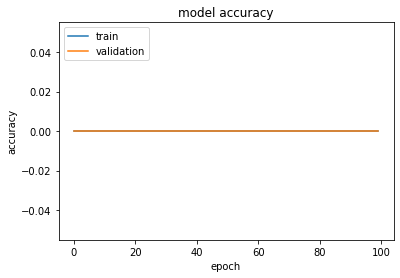

In [19]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**AutoViML**

In [20]:
pip install autoviml

In [21]:
pip install shap

In [22]:
from __future__ import print_function
import sys,tempfile, urllib, os
import pandas as pd

In [23]:
data.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.8,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.8,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.8,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.6,0.299590,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.3,0.106000,5.600000,0.01000,0.165831


In [24]:
size = int(0.7*data.shape[0])
train_df = data[:size]
test_df = data[size:]

In [25]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.682. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.0.46.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [26]:
target='WPI'

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (339, 15)
    Training Set Memory Usage = 0.04 MB
Test Set Shape = (146, 15)
    Test Set Memory Usage = 0.02 MB
Single_Label Target: ['WPI']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  14
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to De

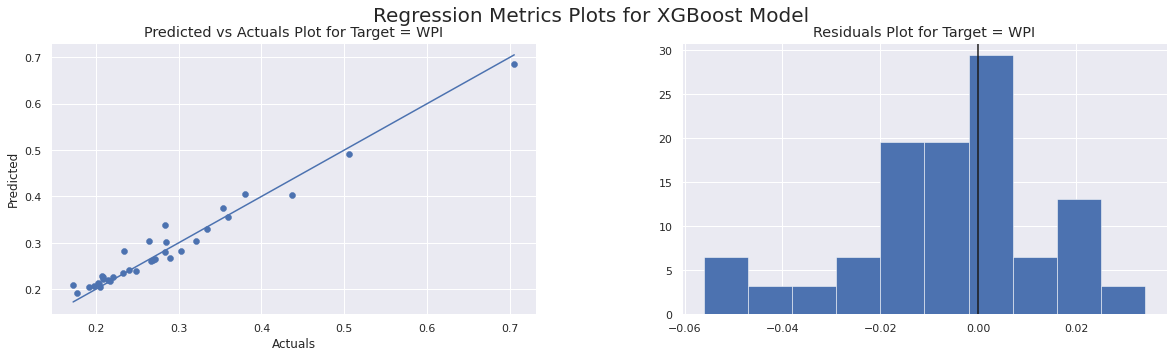

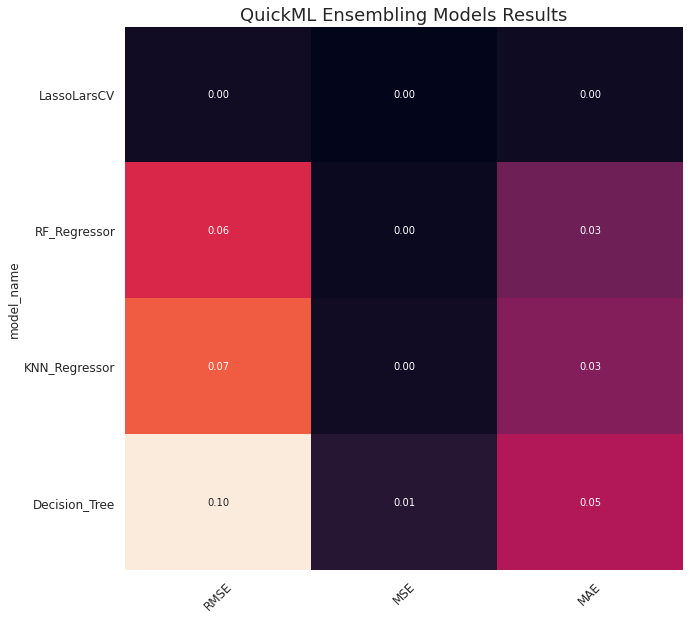

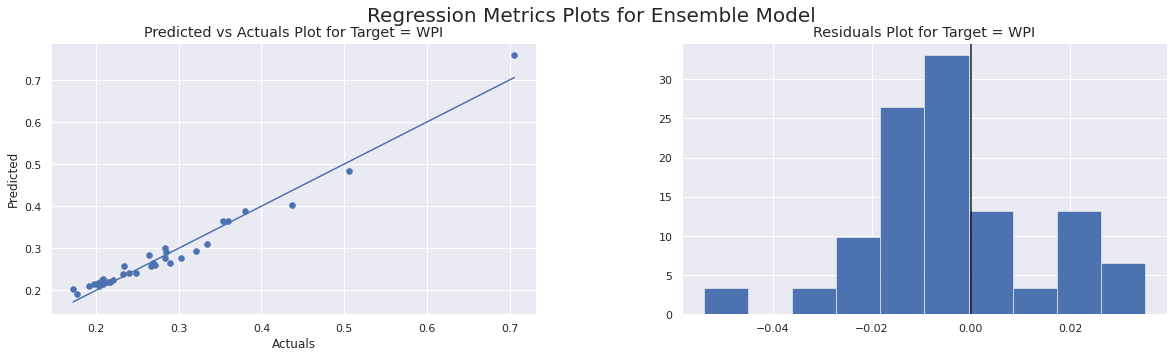

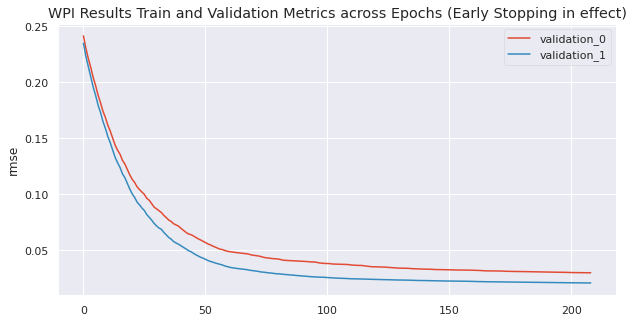

    Time taken for this Target (in seconds) = 99
    Binning_Flag set to False or there are no float vars in data set to be binned
Performing MinMax scaling of train and test data...
#####   T R A I N I N G   M O D E L   O N    F U L L   T R A I N  D A T A  #############
     Actual Training time taken in seconds = 0
Training of models completed. Now starting predictions on test data...
    Calculating weighted average ensemble of 5 regressors
Completed Ensemble predictions on held out data
    Plotting Feature Importances to explain the output of model
############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 100
Writing Output files to disk...
    Saving predictions to ./WPI/WPI_Regression_test_modified.csv
    Saving predictions to ./WPI/WPI_Regression_submission.csv
    Saving predictions to ./WPI/WPI_Regression_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 1.7 for t

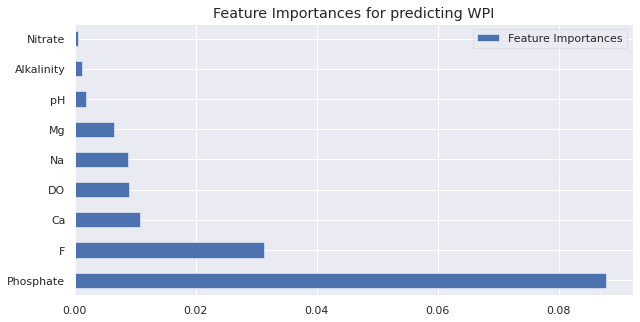

In [27]:
model, features, trainm, testm = Auto_ViML(train_df, target, test_df, sample_submission='',
                                    scoring_parameter='',
                                    hyper_param='RS',feature_reduction=True,
                                     Boosting_Flag=True,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False, 
                                    Imbalanced_Flag=True, 
                                    verbose=1)

In [28]:
features

['Phosphate', 'F', 'DO', 'Na', 'Ca', 'pH', 'Alkalinity', 'Mg', 'Nitrate']

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
testm

,Phosphate,F,DO,Na,Ca,pH,Alkalinity,Mg,Nitrate,WPI_LassoLarsCV_predictions,WPI_Decision_Tree_predictions,WPI_KNN_Regressor_predictions,WPI_RF_Regressor_predictions,WPI_XGBoost_predictions,WPI_Ensembled_predictions,WPI_predictions
340,0.00,0.13,0.31,0.15,0.09,0.88,0.29,0.18,0.07,0.21,0.21,0.24,0.21,0.23,0.22,0.23
342,0.01,0.09,0.31,0.02,0.21,0.68,0.37,0.31,0.03,0.20,0.21,0.24,0.19,0.21,0.21,0.21
343,0.05,0.08,0.26,0.14,0.23,0.78,0.43,0.33,0.06,0.28,0.30,0.27,0.27,0.26,0.27,0.26
344,0.05,0.07,0.19,0.07,0.17,0.46,0.21,0.13,0.08,0.23,0.26,0.24,0.23,0.23,0.24,0.23
345,0.07,0.06,0.15,0.03,0.09,0.60,0.20,0.13,0.20,0.26,0.26,0.22,0.25,0.27,0.26,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0.01,1.06,0.07,0.34,0.74,0.55,-0.07,0.28,0.14,0.40,0.45,0.40,0.45,0.52,0.48,0.52
483,0.02,0.71,0.07,0.45,0.77,0.41,0.71,0.38,0.73,0.42,0.37,0.41,0.40,0.42,0.41,0.42
484,0.09,0.04,0.09,0.86,0.43,-0.60,-0.04,0.54,0.95,0.31,0.30,0.37,0.33,0.41,0.37,0.41
485,0.12,0.62,0.16,0.44,0.53,0.46,0.50,0.51,0.73,0.50,0.50,0.44,0.52,0.46,0.48,0.46
